Dataset Description:

This dataset, sourced from Kaggle, contains synthetic order data for hotel properties across the United States over a two-year period (2015–2016). It includes detailed records of customer orders made by hotel properties for various housekeeping and public area products. The dataset is divided into three primary tables:

Orders Table: Contains order-level data including OrderID, OrderDate, ProductID, PropertyID, and Quantity.

Products Table: Maps ProductID to detailed product attributes such as ProductName, ProductCategory, and Price.

Properties Table: Provides metadata for properties, linking PropertyID to PropertyCity and PropertyState.

This dataset is ideal for practicing data cleaning, merging, aggregation, and visualization with tools like pandas, matplotlib, and seaborn.

link: https://www.kaggle.com/code/aditisaxena20/retail-store-descriptive-analysis/input

# **Retail Store Descriptive Analysis**

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aesthetic settings
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 10
plt.rcParams['figure.autolayout'] = True


Loading datasets

In [ ]:
orders=pd.read_csv('/content/TR_OrderDetails.csv')
products=pd.read_csv('/content/TR_Products.csv')
props=pd.read_csv('/content/TR_PropertyInfo.csv')

Understanding shape of the data

In [ ]:
print('Orders, Products and Props datasets have',orders.shape,products.shape,props.shape,'rows and columns respectively')

Orders, Products and Props datasets have (5000, 5) (94, 4) (20, 3) rows and columns respectively


In [ ]:
print(orders)
print(products)
print(props)

      OrderID   OrderDate  PropertyID  ProductID  Quantity
0           1  01-01-2015          17         41         1
1           2  01-01-2015          15         54         2
2           3  01-01-2015           5         71         2
3           4  01-01-2015          19          3         2
4           5  01-01-2015          12         45         3
...       ...         ...         ...        ...       ...
4995     4996  31-12-2016           3         47         2
4996     4997  31-12-2016          12         57         1
4997     4998  31-12-2016           7         77         1
4998     4999  31-12-2016          17         57         1
4999     5000  31-12-2016           1          9         2

[5000 rows x 5 columns]
    ProductID   ProductName ProductCategory  Price
0           1   Large Towel    Housekeeping      9
1           2    Hand Towel    Housekeeping      5
2           3     Washcloth    Housekeeping      3
3           4       Shampoo    Housekeeping     40
4           

Merge datasets

In [ ]:
df=orders.merge(products,left_on='ProductID',right_on='ProductID',how='left')
df.head()

,OrderID,OrderDate,PropertyID,ProductID,Quantity,ProductName,ProductCategory,Price
0,1,01-01-2015,17,41,1,Office Chair,Furnishings,85
1,2,01-01-2015,15,54,2,Chest of Drawers,Furnishings,150
2,3,01-01-2015,5,71,2,Hammer,Maintenance,17
3,4,01-01-2015,19,3,2,Washcloth,Housekeeping,3
4,5,01-01-2015,12,45,3,Computer Desk,Furnishings,102


In [ ]:
data=df.merge(props,left_on='PropertyID',right_on='Prop ID',how='left')
data.head()

,OrderID,OrderDate,PropertyID,ProductID,Quantity,ProductName,ProductCategory,Price,Prop ID,PropertyCity,PropertyState
0,1,01-01-2015,17,41,1,Office Chair,Furnishings,85,17,Las Vegas,Nevada
1,2,01-01-2015,15,54,2,Chest of Drawers,Furnishings,150,15,Chicago,Illinois
2,3,01-01-2015,5,71,2,Hammer,Maintenance,17,5,Kansas City,Missouri
3,4,01-01-2015,19,3,2,Washcloth,Housekeeping,3,19,Los Angeles,California
4,5,01-01-2015,12,45,3,Computer Desk,Furnishings,102,12,Dallas,Texas


Total sales

In [ ]:
data['Total Sales']= data['Quantity']*data['Price']
data.head()

,OrderID,OrderDate,PropertyID,ProductID,Quantity,ProductName,ProductCategory,Price,Prop ID,PropertyCity,PropertyState,Total Sales
0,1,01-01-2015,17,41,1,Office Chair,Furnishings,85,17,Las Vegas,Nevada,85
1,2,01-01-2015,15,54,2,Chest of Drawers,Furnishings,150,15,Chicago,Illinois,300
2,3,01-01-2015,5,71,2,Hammer,Maintenance,17,5,Kansas City,Missouri,34
3,4,01-01-2015,19,3,2,Washcloth,Housekeeping,3,19,Los Angeles,California,6
4,5,01-01-2015,12,45,3,Computer Desk,Furnishings,102,12,Dallas,Texas,306


In [ ]:
data.shape

(5000, 12)

In [ ]:
data.isnull().sum()

,0
OrderID,0
OrderDate,0
PropertyID,0
ProductID,0
Quantity,0
ProductName,0
ProductCategory,0
Price,0
Prop ID,0
PropertyCity,0


#1. Maximum quantity sold in any transaction

In [ ]:
data['Quantity'].max()

3

#2. Unique products in all the transactions

In [ ]:
print("There are" ,data['ProductName'].nunique(),"unique products in the store")

There are 94 unique products in the store


#Total sales of each product by quantity

<ipython-input-22-4497cfab8017>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph1=sns.barplot(data=Top_by_quant.head(10),x='ProductName',y='Quantity',palette='rocket')


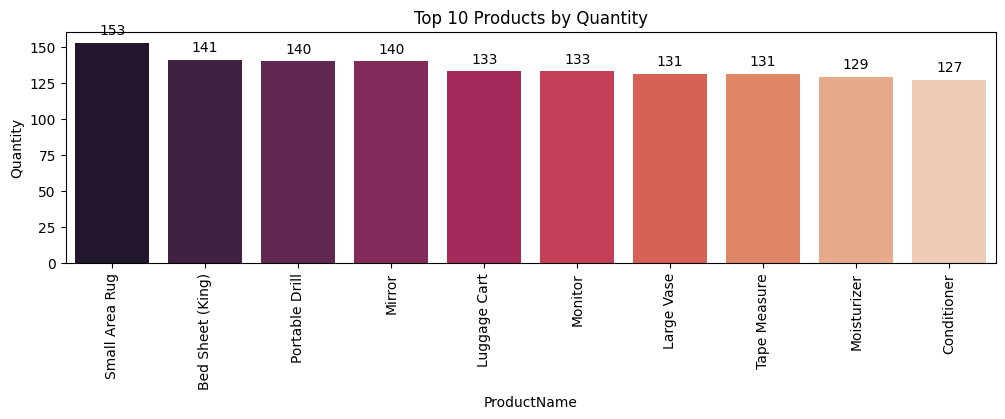

In [ ]:
Top_by_quant=pd.DataFrame(data.groupby(['ProductName']).sum()['Quantity']).sort_values(by='Quantity',ascending=False)
Top_by_quant=Top_by_quant.reset_index()

#Plotting Top 10
plt.figure(figsize=(12,3))
graph1=sns.barplot(data=Top_by_quant.head(10),x='ProductName',y='Quantity',palette='rocket')
graph1.set(title='Top 10 Products by Quantity')
plt.xticks(rotation=90)
#plt.show()

for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '1.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9) ,
                   textcoords = 'offset points')

<ipython-input-23-b0dcb1aeb409>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph2=sns.barplot(data=Top_by_sales.head(10),x='ProductName',y='Total Sales',palette='mako')


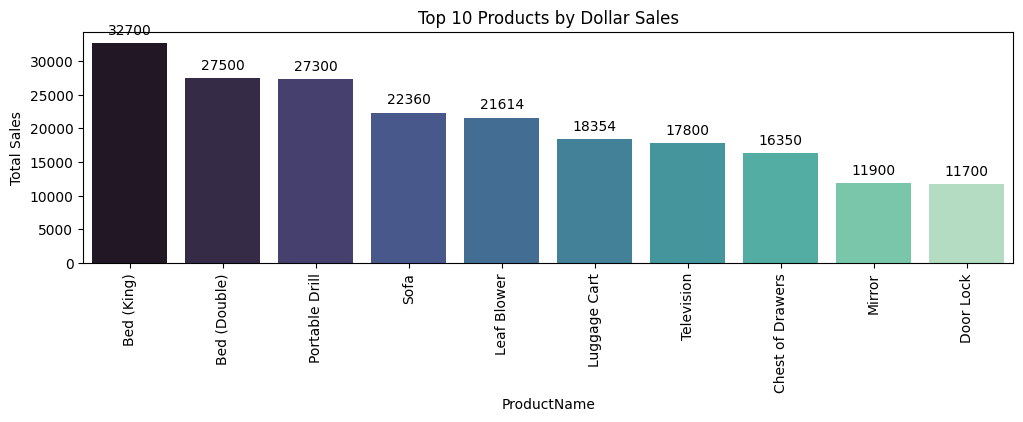

In [ ]:
#By Sales
Top_by_sales=pd.DataFrame(data.groupby(['ProductName']).sum()['Total Sales']).sort_values(by='Total Sales',ascending=False)
Top_by_sales=Top_by_sales.reset_index()
#Plotting Top 10
plt.figure(figsize=(12,3))
graph2=sns.barplot(data=Top_by_sales.head(10),x='ProductName',y='Total Sales',palette='mako')
graph2.set(title='Top 10 Products by Dollar Sales')
plt.xticks(rotation=90)
#plt.show()

for a in graph2.patches:
    graph2.annotate(format(a.get_height(),'1.0f'),
                   (a.get_x()+a.get_width()/2,a.get_height()),
                   ha="center",va="center",
                   xytext=(0,9),
                   textcoords='offset points')

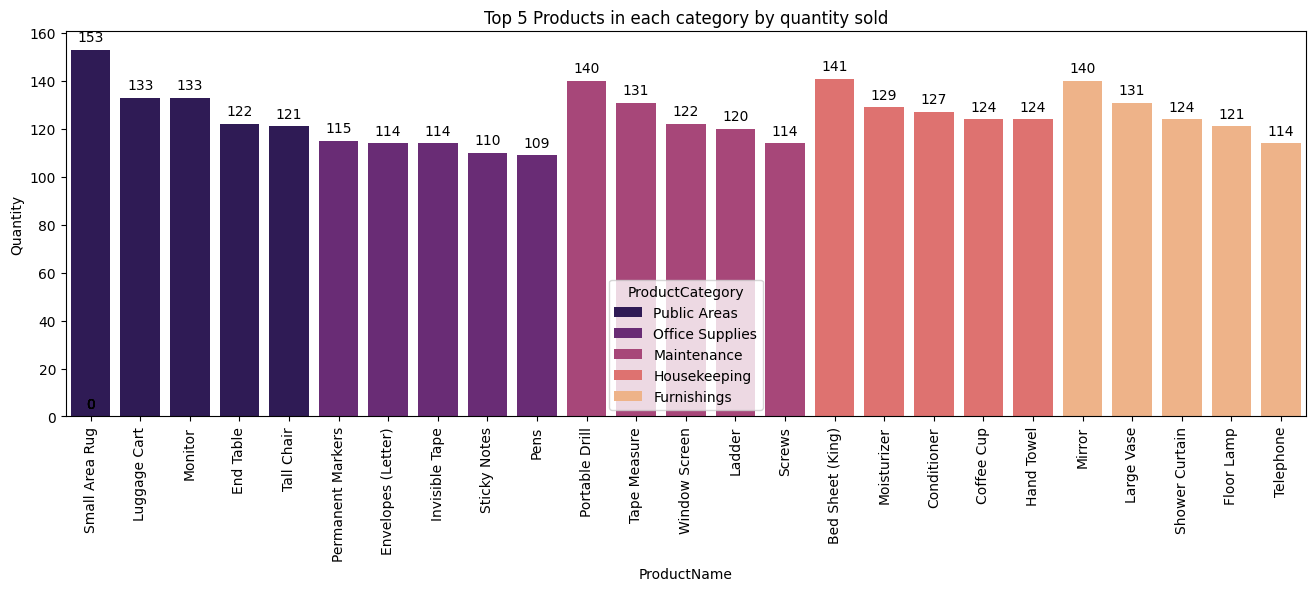

In [ ]:
#Products distribution by category
prod_cat=pd.DataFrame(data.groupby(['ProductCategory','ProductName']).sum()['Quantity'])
prod_cat=prod_cat.reset_index().sort_values(by=['ProductCategory','Quantity'],ascending=False)
#Top 5 Products in each category by quantity sold
Top_5_prod_cat=prod_cat.groupby('ProductCategory').head(5)
plt.figure(figsize=(16,5))
graph3=sns.barplot(data=Top_5_prod_cat,x='ProductName',y='Quantity',hue='ProductCategory',dodge=False,palette='magma')
graph3.set(title='Top 5 Products in each category by quantity sold')
plt.xticks(rotation=90)
#plt.show()

for a in graph3.patches:
    graph3.annotate(format(a.get_height(),'1.0f'),
                   (a.get_x()+a.get_width()/2,a.get_height()),
                   ha="center",va="center",
                   xytext=(0,9),
                   textcoords='offset points')

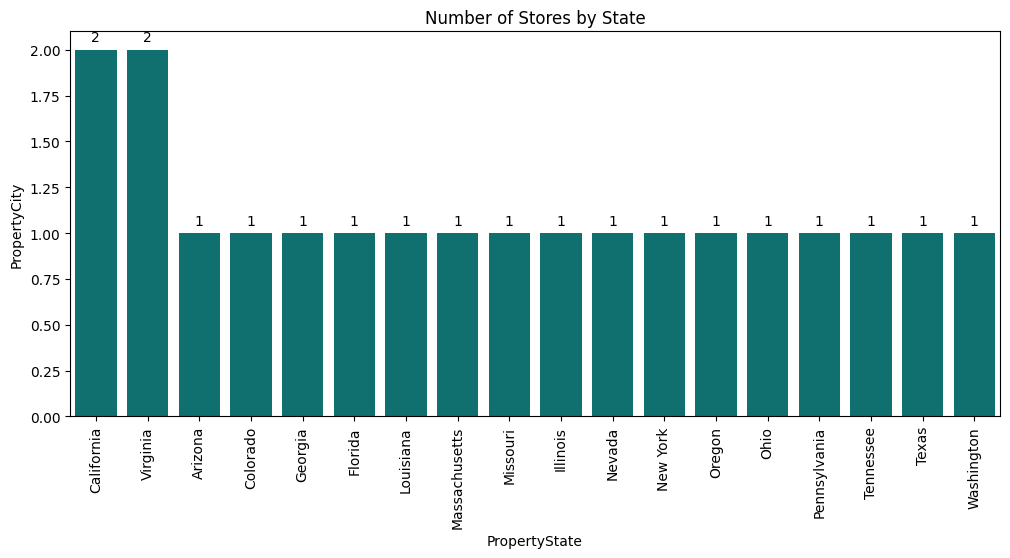

In [ ]:
#Distribution of stores amongst states
stores_by_city=pd.DataFrame(data.groupby(['PropertyState']).nunique()['PropertyCity'])
stores_by_city=stores_by_city.reset_index().sort_values(by='PropertyCity',ascending=False)
plt.figure(figsize=(12,5))
graph4=sns.barplot(data=stores_by_city,x='PropertyState',y='PropertyCity',color='teal')
graph4.set(title='Number of Stores by State')
plt.xticks(rotation=90)
#plt.show()

for a in graph4.patches:
    graph4.annotate(format(a.get_height(),'1.0f'),
                   (a.get_x()+a.get_width()/2,a.get_height()),
                   ha="center",va="center",
                   xytext=(0,9),
                   textcoords='offset points')

In [ ]:
#Top 5 properties that registered highest sales
highest_sales=pd.DataFrame(data.groupby(['PropertyCity']).sum()['Total Sales'])
highest_sales=highest_sales.reset_index().sort_values(by='Total Sales',ascending=False)
highest_sales.head(5)

,PropertyCity,Total Sales
7,Kansas City,32859
3,Chicago,29218
9,Los Angeles,28004
11,New Orleans,27483
2,Boston,27094


#Most Ordered Products by Quantity

<ipython-input-30-b1d0a3272064>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_quantity.values, y=top_quantity.index, palette='magma')


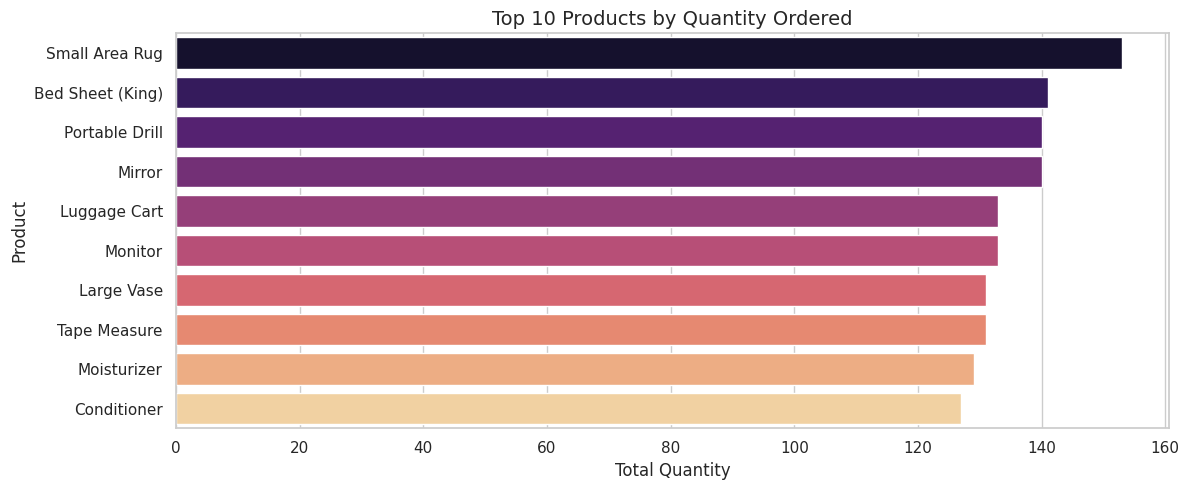

In [ ]:
top_quantity = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_quantity.values, y=top_quantity.index, palette='magma')
plt.title('Top 10 Products by Quantity Ordered', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()


In [ ]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'], dayfirst=True, errors='coerce')


#Sales Trend Over Time

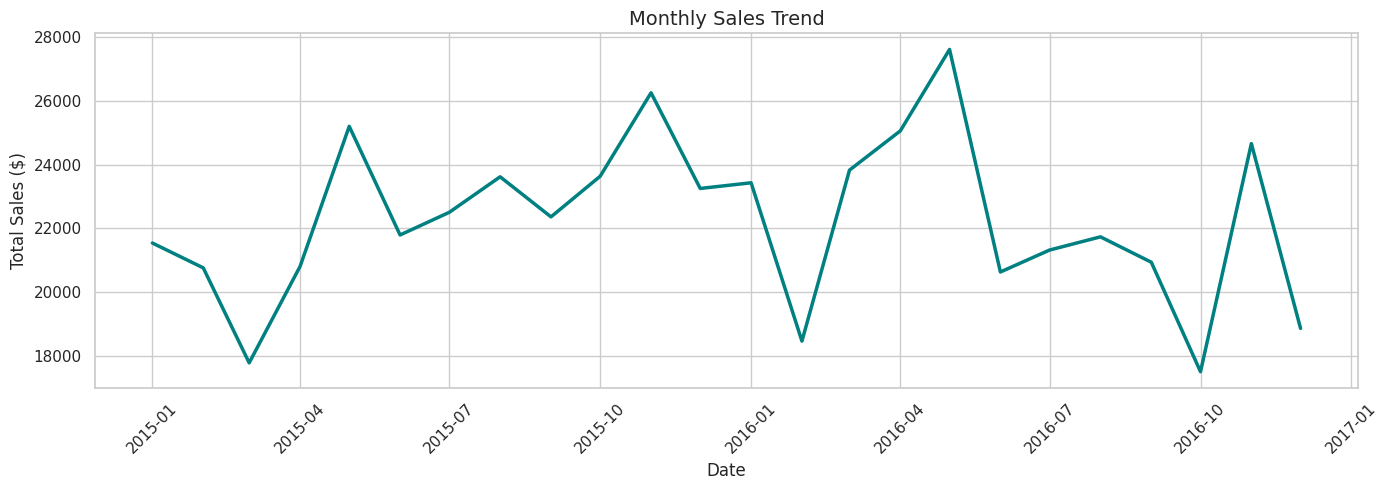

In [ ]:
monthly_sales = data.groupby(data['OrderDate'].dt.to_period('M'))['TotalSales'].sum().sort_index()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(14,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, color='teal', linewidth=2.5)
plt.title('Monthly Sales Trend', fontsize=14)
plt.ylabel('Total Sales ($)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Top Performing Properties

<ipython-input-34-67eb9a48ae06>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='cubehelix')


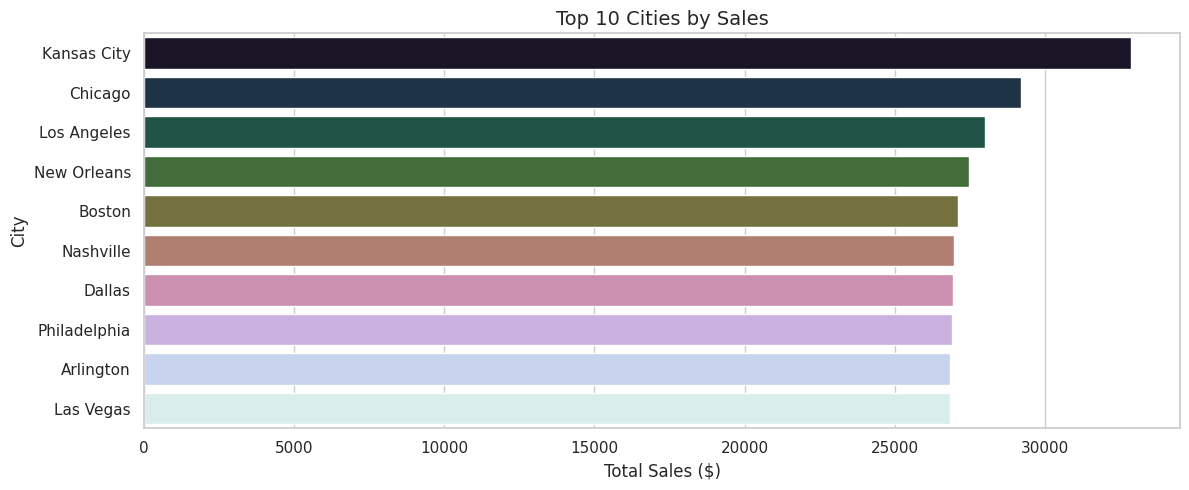

In [ ]:
top_cities = data.groupby('PropertyCity')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='cubehelix')
plt.title('Top 10 Cities by Sales', fontsize=14)
plt.xlabel('Total Sales ($)')
plt.ylabel('City')
plt.show()


#Product Category Distribution

<ipython-input-35-0165bb8aad43>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_qty.values, y=cat_qty.index, palette='crest')


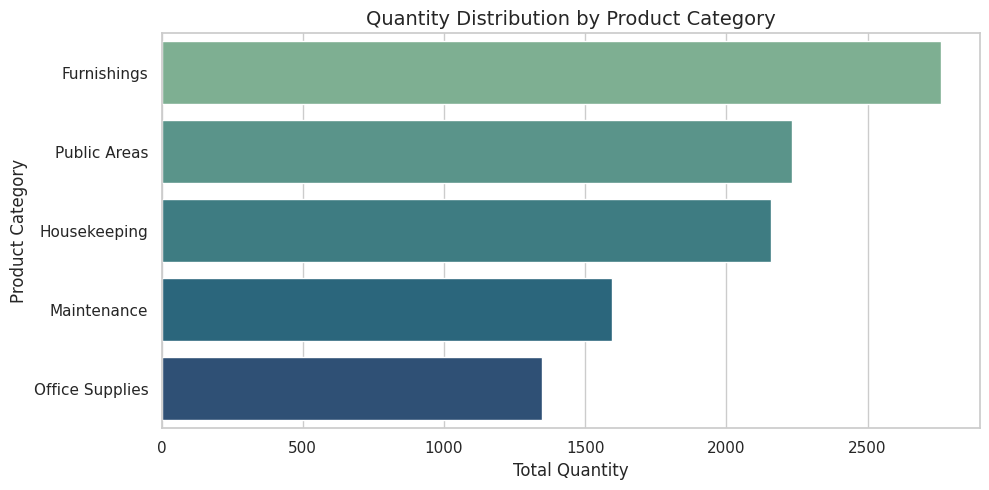

In [ ]:
cat_qty = data.groupby('ProductCategory')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=cat_qty.values, y=cat_qty.index, palette='crest')
plt.title('Quantity Distribution by Product Category', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Product Category')
plt.show()


#Average Order Size

In [ ]:
avg_order_size = data.groupby('OrderID')['Quantity'].sum().mean()
print(f'📦 Average order size: {avg_order_size:.2f} items per order')


📦 Average order size: 2.02 items per order


#Sales by state

<ipython-input-37-7822bec2f7d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette='flare')


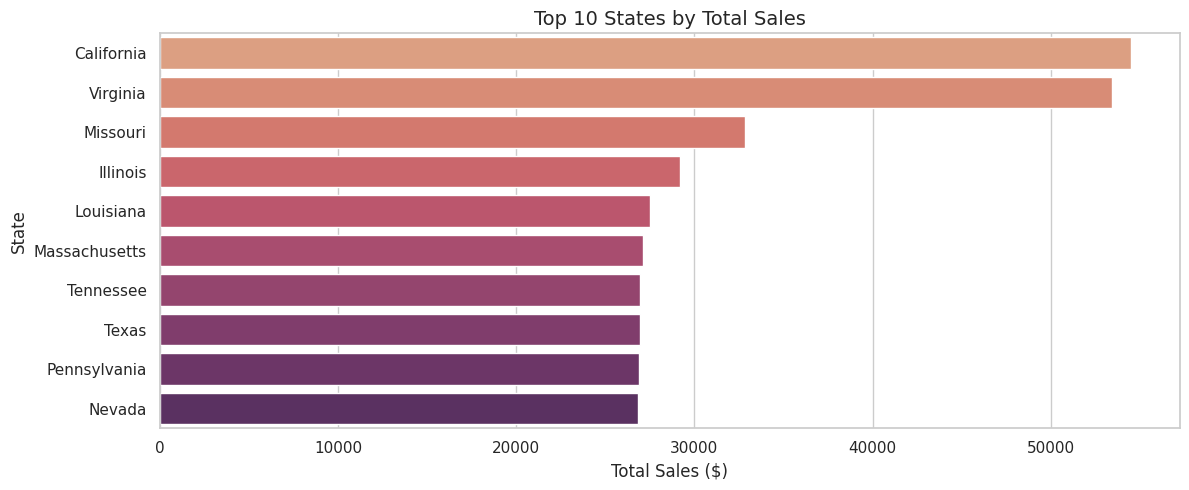

In [ ]:
state_sales = data.groupby('PropertyState')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=state_sales.values, y=state_sales.index, palette='flare')
plt.title('Top 10 States by Total Sales', fontsize=14)
plt.xlabel('Total Sales ($)')
plt.ylabel('State')
plt.show()


#Price Distribution by Category

<ipython-input-38-6e6505fdd521>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='ProductCategory', y='Price', palette='pastel')


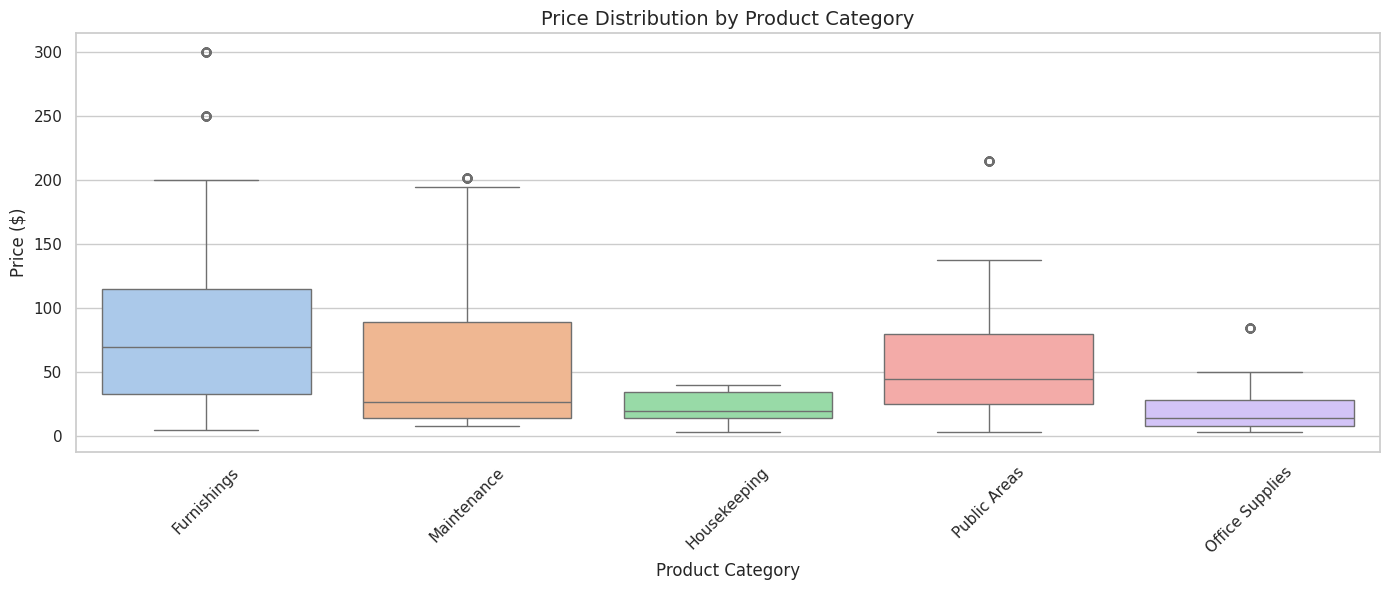

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=data, x='ProductCategory', y='Price', palette='pastel')
plt.title('Price Distribution by Product Category', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Price ($)')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()


#Most Frequently Ordered Products

<ipython-input-39-824ba0636b73>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repeat.values, y=repeat.index, palette='light:#5A9')


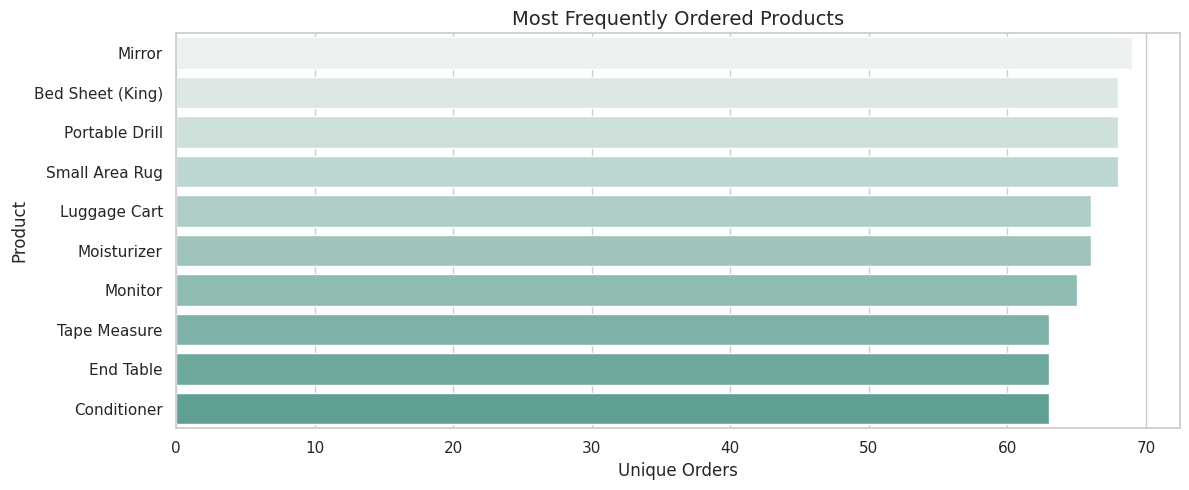

In [ ]:
repeat = data.groupby('ProductName')['OrderID'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=repeat.values, y=repeat.index, palette='light:#5A9')
plt.title('Most Frequently Ordered Products', fontsize=14)
plt.xlabel('Unique Orders')
plt.ylabel('Product')
plt.show()


#Revenue Contribution by Category

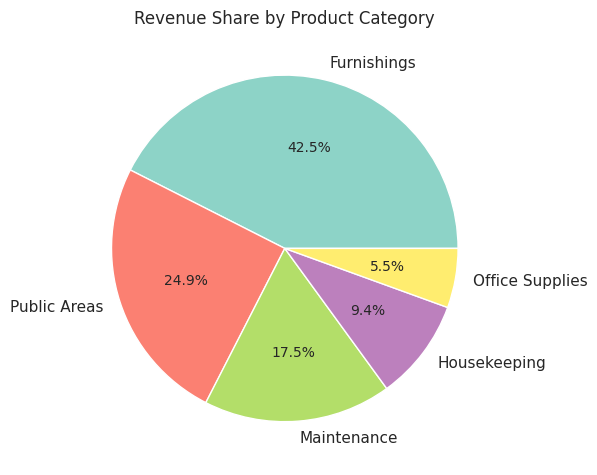

In [ ]:
cat_sales = data.groupby('ProductCategory')['TotalSales'].sum()
cat_pct = 100 * cat_sales / cat_sales.sum()

plt.figure(figsize=(6,6))
cat_pct.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', cmap='Set3')
plt.title('Revenue Share by Product Category')
plt.ylabel('')
plt.tight_layout()
plt.show()
